<a href="https://colab.research.google.com/github/machanigechemba/machanigechemba/blob/main/fridah_Python_homework_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Session #3: Data Summary / Satistics - Homework Assignment


## Lecture Structure:

1. Measure of central tendency

- Mean
- Median
- Mode

2. Measure of spread

- Range
- Standard Deviation
- Variance

3. Correlation coeffcient

## We will use:
- `statistics.mean()`,
`statistics.median()`,
`statistics.mean()`,
`groupby.mean()`,
`groupby.median()`,
`gmean()`,
`statistics.stdev()`,
`statistics.variance()`,
`corr()`,
`numpy.corrcoef()`

In [ ]:
### Importing libraries and packages
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Reading data

cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")  # cars dataset
olist = pd.read_csv("https://raw.githubusercontent.com/Kartthik-Rathinakumar/ReDI/main/Olist.csv")  # Olist - new dataset
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")


## **Question #1 : Rentals dataset**

For the rentals dataset, identify:

1. Dependent variable

2. Indpendent variable(s)

3. Statistically prove their relation, use the help of visual diagram whenever necessary.

In [ ]:
### Answer #1.1
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


Rent is the dependent variable which is affected by the number of rooms an apartment has and available space in square meters.

In [ ]:
### Answer #1.2

Independent variables are:

The number of rooms an apartment has,

The size of an apartment in terms of space

In [ ]:
### Answer #1.3
#rentals.corr() worked first but later didn't
rentals.corr(numeric_only=True)

,Rooms,Rent,Year_Construction,Space
Rooms,1.000000,0.628816,-0.009086,0.793338
Rent,0.628816,1.000000,0.078858,0.855683
Year_Construction,-0.009086,0.078858,1.000000,-0.082940
Space,0.793338,0.855683,-0.082940,1.000000


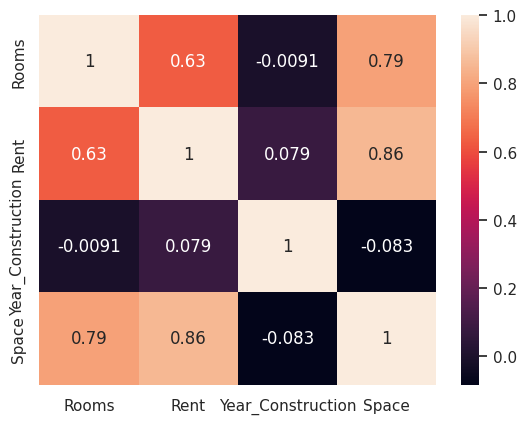

In [ ]:
sns.heatmap(rentals.corr(numeric_only=True),
            xticklabels=True,
            yticklabels=True,
            annot=True);

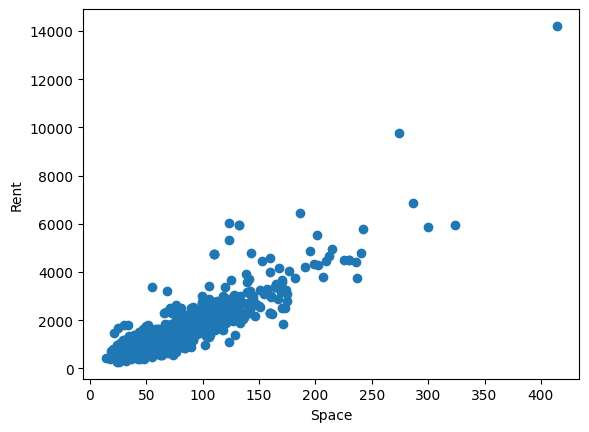

In [ ]:
#plot the relationship
plt.scatter(rentals['Space'], rentals['Rent'])
plt.xlabel('Space')
plt.ylabel('Rent')
plt.show()

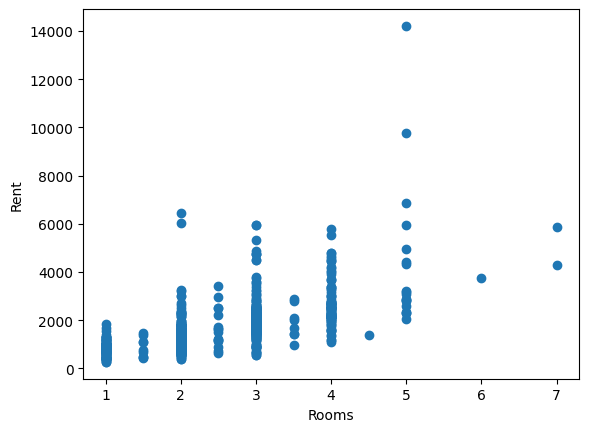

In [ ]:
plt.scatter(rentals['Rooms'], rentals['Rent'])
plt.xlabel('Rooms')
plt.ylabel('Rent')
plt.show()

Rent has a strong positive correlation with the amount of space available in square meters and the number of rooms an apartment has.

## **Question #2 : rentals dataset**

Identify the best region to live, based on:

1. Average Price

2. Average Rooms Available

3. Average Space

4. What type of apartment condition is mostly available in Mitte, Kruezberg and Wilmersforf respectively?

In [ ]:
### Identify the best region to live, based on: Average Price
best_by_price = rentals.groupby('Region')['Rent'].mean().sort_values()
best_by_price

Region
Wedding             847.138571
Friedrichsfelde    1043.871731
Köpenick           1125.475818
Neukölln           1188.114915
Wilmersdorf        1748.646226
Charlottenburg     1753.452532
Tiergarten         1914.824795
Prenzlauer         1996.962264
Kreuzberg          2049.138085
Mitte              2408.725033
Name: Rent, dtype: float64

Wedding is the best region to live based on price because on average, rent is cheap in this region.

In [ ]:
### Identify the best region to live, based on: Average Rooms Available
#rentals.groupby('Region')['Rooms', 'Rent'].mean().sort_values('Rent') #was working not produces an error..fix with double [[]]
rentals.groupby('Region')[['Rooms', 'Rent']].mean().sort_values('Rent')

,Rooms,Rent
Region,,
Wedding,1.726190,847.138571
Friedrichsfelde,2.500000,1043.871731
Köpenick,2.281818,1125.475818
Neukölln,2.279661,1188.114915
Wilmersdorf,2.613208,1748.646226
Charlottenburg,2.525316,1753.452532
Tiergarten,2.736842,1914.824795
Prenzlauer,2.660377,1996.962264
Kreuzberg,2.489362,2049.138085


In [ ]:
#round(rentals.groupby('Region')['Rooms', 'Rent'].mean().sort_values('Rent'),2) #was working but now produces an error
round(rentals.groupby('Region')[['Rooms', 'Rent']].mean().sort_values('Rent'),2)

,Rooms,Rent
Region,,
Wedding,1.73,847.14
Friedrichsfelde,2.50,1043.87
Köpenick,2.28,1125.48
Neukölln,2.28,1188.11
Wilmersdorf,2.61,1748.65
Charlottenburg,2.53,1753.45
Tiergarten,2.74,1914.82
Prenzlauer,2.66,1996.96
Kreuzberg,2.49,2049.14


Friedrichsfelde is the best region to live based on the average number of rooms because, in this region, 2.5 rooms go for 1,043.87 euros.

In [ ]:
### Identify the best region to live, based on: Average Space
#best_by_space = round(rentals.groupby('Region')['Space', 'Rent'].mean().sort_values('Space'),2) #was working but now produces an error
best_by_space = round(rentals.groupby('Region')[['Space', 'Rent']].mean().sort_values('Space'),2)
best_by_space

,Space,Rent
Region,,
Wedding,46.93,847.14
Friedrichsfelde,66.14,1043.87
Neukölln,69.85,1188.11
Köpenick,74.28,1125.48
Wilmersdorf,85.54,1748.65
Charlottenburg,88.08,1753.45
Tiergarten,90.23,1914.82
Kreuzberg,92.26,2049.14
Prenzlauer,95.83,1996.96


In [ ]:
best_by_space.describe()

,Space,Rent
count,10.000000,10.000000
mean,80.538000,1607.635000
std,15.929832,519.446498
min,46.930000,847.140000
25%,70.957500,1141.137500
50%,86.810000,1751.050000
75%,91.752500,1976.425000
max,96.240000,2408.730000


In [ ]:
best_by_space['Space'].max() - best_by_space['Space'].min()

49.309999999999995

In [ ]:
best_by_space['Space'].median()

86.81

In [ ]:
best_by_space.max() - best_by_space.min()

Space      49.31
Rent     1561.59
dtype: float64

In [ ]:
best_by_space.median()

Space      86.81
Rent     1751.05
dtype: float64

In [ ]:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


In [ ]:
rentals['Rent'].mode()

0    1200.0
1    1650.0
Name: Rent, dtype: float64

In [ ]:
rentals['Rent'].median()

1565.48

Willmersdorf and Charlottenburg are the best regions to live based on average space as they offer price prices for apartment size between 85 to 88 square meters.

In [ ]:
### What type of apartment condition is mostly available in Mitte, Kruezberg and Wedding respectively?
three_regions = rentals.query('Region in["Mitte", "Kreuzberg", "Wedding"]')
three_regions.groupby('Region')['Condition'].value_counts()

Region     Condition                         
Kreuzberg  mint_condition                        17
           first_time_use                        11
           no_information                         7
           well_kept                              4
           first_time_use_after_refurbishment     2
           refurbished                            2
           modernized                             2
           fully_renovated                        2
Mitte      mint_condition                        49
           first_time_use                        43
           no_information                        29
           refurbished                           15
           first_time_use_after_refurbishment     7
           well_kept                              6
           fully_renovated                        3
           modernized                             1
Wedding    mint_condition                        16
           no_information                        10
           first_t

In Mitte, apartments are mostly either in mint condition or first time use. A good number of apartments have no information available.

In Kreuzberg, apartments are mostly available in mint condition and a good number of them are either in first time use or have no information available.

Wedding apartments are also available mainly in mint condition.

## **Question #3 : rentals dataset**

1. In what location are both the mean and median are same in terms of apartment Space?
2. Identify the location where the apartment rent variation is the highest
3. What is the average price of 2 room apartment in Mitte?

In [ ]:
### In what location are both the mean and median are same in terms of apartment Space?
rentals.groupby(["Region"]).agg({"Space":['mean', 'median']},)

Space       
                      mean median
Region                           
Charlottenburg   88.083038  80.77
Friedrichsfelde  66.145000  61.68
Kreuzberg        92.258723  85.60
Köpenick         74.279273  74.00
Mitte            96.235556  85.48
Neukölln         69.849831  66.00
Prenzlauer       95.832264  79.56
Tiergarten       90.228304  89.19
Wedding          46.928571  38.08
Wilmersdorf      85.536604  77.00

The mean apartment space in Köpenick is the same as the median apartment space!

In [ ]:
### Identify the location where the apartment rent variation is very the highest
rentals.groupby('Region')["Rent"].std().sort_values(ascending = False)

Region
Mitte              1543.059190
Kreuzberg          1172.802355
Charlottenburg     1125.786523
Prenzlauer         1088.544439
Wilmersdorf         941.443278
Tiergarten          786.464690
Neukölln            552.145415
Friedrichsfelde     403.402469
Köpenick            390.822563
Wedding             333.446416
Name: Rent, dtype: float64

In [ ]:
#standard deviation is the most used measure of spread or variability
highest_variation = round(rentals.groupby(["Region"]).agg({"Rent":['min', 'max', 'std', 'var']},), 2)
highest_variation

Rent                               
                    min       max      std         var
Region                                                
Charlottenburg   478.52   9774.00  1125.79  1267395.30
Friedrichsfelde  280.74   2138.68   403.40   162733.55
Kreuzberg        435.74   6450.00  1172.80  1375465.36
Köpenick         558.06   2159.20   390.82   152742.28
Mitte            398.00  14207.00  1543.06  2381031.66
Neukölln         379.95   2295.00   552.15   304864.56
Prenzlauer       475.00   5930.00  1088.54  1184929.00
Tiergarten       271.25   4945.00   786.46   618526.71
Wedding          352.95   1949.26   333.45   111186.51
Wilmersdorf      404.39   5876.35   941.44   886315.45

The rent in Mitte varies a lot! On average, the rent in this region vary by roughly 1,543 euros above and below the mean rent.

In [ ]:
#to visualize the spread of rent in mitte
mean_mitte = rentals.query('Region == "Mitte"')["Rent"].mean()
mean_mitte

2408.7250326797384

In [ ]:
std_mitte = rentals.query('Region == "Mitte"')["Rent"].std()
std_mitte

1543.0591896052345

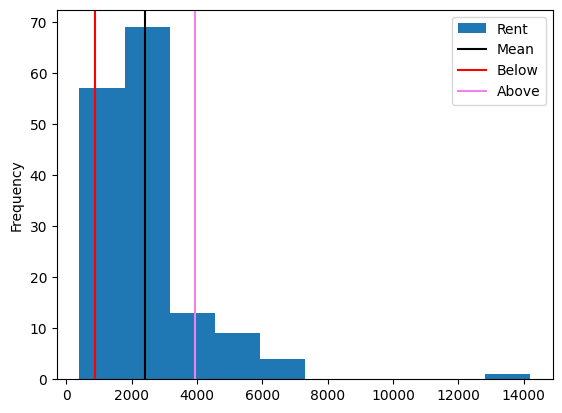

In [ ]:
rentals[rentals.Region == 'Mitte']["Rent"].plot.hist()
plt.axvline(mean_mitte, color = 'Black', label = 'Mean')
plt.axvline(mean_mitte - std_mitte, color = 'Red', label = 'Below')
plt.axvline(mean_mitte + std_mitte, color = 'Violet', label = 'Above')
plt.legend()

In [ ]:
### What is the average price of 2 room apartment in Mitte?
round(rentals.query('Region == "Mitte" & Rooms == 2')["Rent"].mean(), 2)

1805.73

In [ ]:
middle = rentals.query('Region == "Mitte"').groupby('Rooms').describe()
middle

Rent                                                          \
      count         mean          std      min        25%       50%   
Rooms                                                                 
1.0    10.0  1047.050000   455.811644   398.00   758.5000   911.720   
1.5     3.0  1125.333333   360.090729   770.00   943.0000  1116.000   
2.0    51.0  1805.733333   755.684983  1090.00  1466.3700  1563.750   
2.5     2.0  2060.270000   604.901567  1632.54  1846.4050  2060.270   
3.0    54.0  2460.510556  1119.765163  1356.44  1803.7125  2007.105   
4.0    27.0  3434.157037  1087.250278  1960.00  2495.5250  3060.000   
5.0     6.0  5480.946667  4609.605203  2310.00  2457.8875  3595.590   

                           Year_Construction               ...           \
             75%       max             count         mean  ...      75%   
Rooms                                                      ...            
1.0    1237.5450   1850.00              10.0  2013.500000  ...  2017.00   
1.5    1303.0000   1490.00               3.0  1966.666667  ...  2005.00   
2.0    1887.3650   6022.50              51.0  2007.372549  ...  2018.00   
2.5    2274.1350   2488.00               2.0  2013.500000  ...  2013.75   
3.0    2537.5000   5936.40              54.0  1993.018519  ...  2019.00   
4.0    4321.3150   5774.83              27.0  2000.666667  ...  2017.50   
5.0    6223.0325  14207.00               6.0  2010.333333  ...  2015.00   

              Space                                                     \
          max count        mean         std     min       25%      50%   
Rooms                                                                    
1.0    2018.0  10.0   42.123000   28.291412   18.00   23.6200   29.345   
1.5    2013.0   3.0   36.000000   15.524175   21.00   28.0000   35.000   
2.0    2020.0  51.0   68.214118   20.358186   30.00   54.8350   66.000   
2.5    2014.0   2.0   95.805000    8.209510   90.00   92.9025   95.805   
3.0    2020.0  54.0  100.542593   26.465850   66.55   80.9125   94.950   
4.0    2020.0  27.0  140.946667   41.891137   55.00  116.7050  129.670   
5.0    2017.0   6.0  214.903333  115.669609  123.08  129.1300  170.375   

                         
            75%     max  
Rooms                    
1.0     54.3100  109.00  
1.5     43.5000   52.00  
2.0     75.5950  133.19  
2.5     98.7075  101.61  
3.0    113.9275  170.45  
4.0    156.3500  242.64  
5.0    264.8175  413.91  

[7 rows x 24 columns]

The average rent of a 2 room apartment in Mitte is 1805.73 euros.

## **Question #4 : Apartments dataset**

Identify an outlier from the Apartments dataset. Statistically show the difference in central tendency with and without those outliers.



**Hint**

Identify the outliers visually with a plot.

In [ ]:
#Answer
#numerical colums: rent, rooms, space & year of construction
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


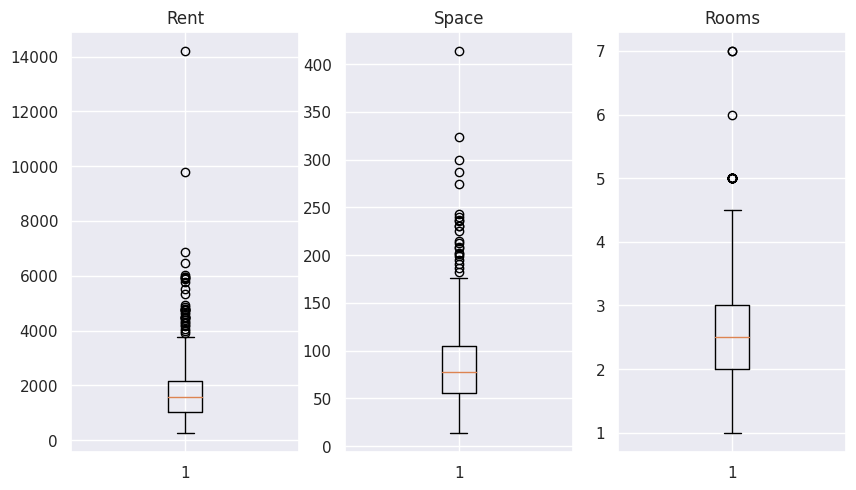

In [ ]:
#visualize outliers using boxplots in a grid
plt.figure(figsize=(10,12))
plt.subplot(2, 3, 1)
plt.boxplot(rentals['Rent'])
plt.title('Rent')
plt.subplot(2, 3, 2)
plt.boxplot(rentals['Space'])
plt.title('Space')
plt.subplot(2, 3, 3)
plt.boxplot(rentals['Rooms'])
plt.title('Rooms')
plt.show()


Most values lie below 6,000 for rent, 250 for space and 5 rooms.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

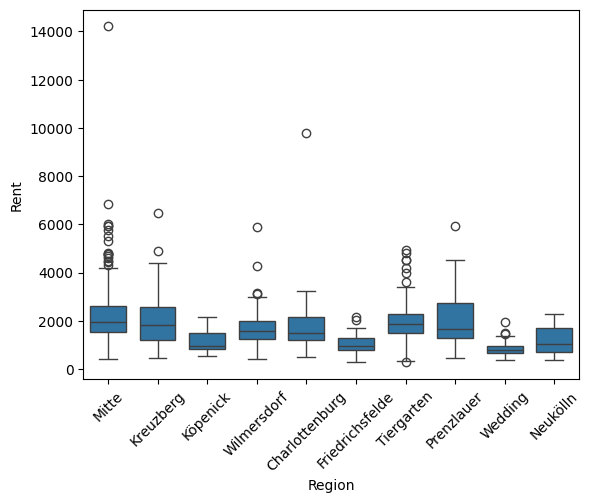

In [ ]:
my_plot = sns.boxplot(data = rentals, x="Region", y="Rent", gap=.1)
plt.setp(my_plot.get_xticklabels(), rotation=45)

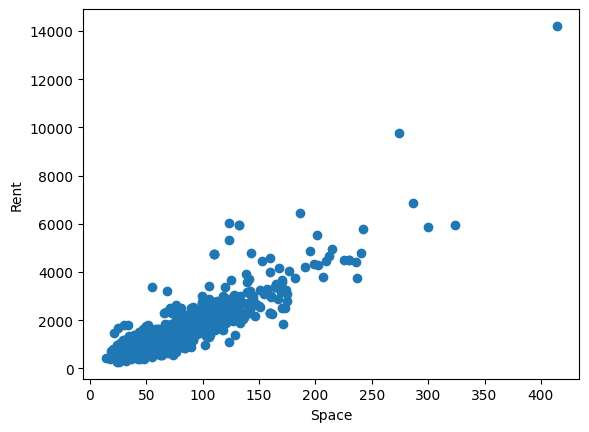

In [ ]:
#visualize extreme values space vs rent
plt.scatter(rentals['Space'], rentals['Rent'])
plt.xlabel('Space')
plt.ylabel('Rent')
plt.show()

Most of the data points are below 4,000 euros of rent and 200 square meters of space

**Measures of central tendency with outliers**

In [ ]:
#all numerical columns with outliers.
round(rentals.describe(), 2)

,Rooms,Rent,Year_Construction,Space
count,764.00,764.00,764.00,764.00
mean,2.55,1768.56,1983.70,84.66
std,1.01,1118.26,48.01,44.20
min,1.00,271.25,1864.00,14.00
25%,2.00,1039.50,1959.00,55.10
50%,2.50,1565.48,2015.00,77.60
75%,3.00,2170.00,2019.00,104.45
max,7.00,14207.00,2020.00,413.91


In [ ]:
#Rent
print("The mean Rent is ", round(rentals['Rent'].mean(), 2))

The mean Rent is  1768.56


In [ ]:
print("The mode Rent is ", round(rentals['Rent'].mode(), 2))

The mode Rent is  0    1200.0
1    1650.0
Name: Rent, dtype: float64


In [ ]:
print("The median Rent is ", rentals['Rent'].median())

The median Rent is  1565.48


In [ ]:
#Space
print("The mean Space is ", round(rentals['Space'].mean(), 2))

The mean Space is  84.66


In [ ]:
print("The mode Space is ", rentals['Space'].mode())

The mode Space is  0    20.5
1    60.0
Name: Space, dtype: float64


In [ ]:
print("The median Space is ", rentals['Space'].median())

The median Space is  77.6


In [ ]:
#for Rooms
round(rentals['Rooms'].mean(), 2)

2.55

In [ ]:
rentals['Rooms'].mode()

0    2.0
Name: Rooms, dtype: float64

In [ ]:
print("The median Rooms is ", rentals['Rooms'].median())

The median Rooms is  2.5


In [ ]:
#year of construction
round(rentals['Year_Construction'].mean(), 2)

1983.7

In [ ]:
round(rentals['Year_Construction'].median(), 2)

2015.0

In [ ]:
round(rentals['Year_Construction'].mode(), 2)

0    2019
Name: Year_Construction, dtype: int64

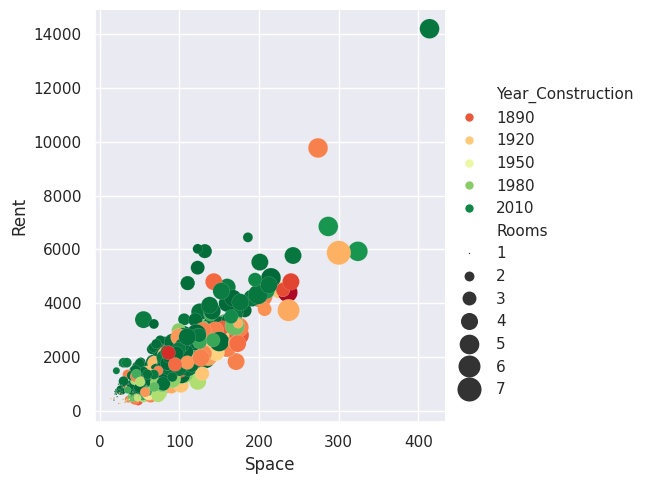

In [ ]:
#all numerical columns with outliers. visualize the relationship
sns.set_theme()
sns.relplot(data=rentals, x='Space', y='Rent',
            hue='Year_Construction', palette='RdYlGn',
            size='Rooms', sizes=(1,300))
plt.show()

Most of the data points are on the bottom left corner i.e., below 5,000 euros of rent and 200 square meters of space.

**Set 5,000 euros and 200 square meters as the threshold**

In [ ]:
#calculate z-score for rent
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rentals['Rent']))
print(z)

0      0.796791
1      0.508765
2      0.706522
3      0.055174
4      0.450492
         ...   
759    0.724419
760    1.001816
761    0.878220
762    0.455970
763    0.787952
Name: Rent, Length: 764, dtype: float64


In [ ]:
#remove outliers where Z-score is greather than 2
threshold_z = 2
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = rentals.drop(outlier_indices)
print("Original DataFrame Shape:", rentals.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (764, 6)
DataFrame Shape after Removing Outliers: (732, 6)


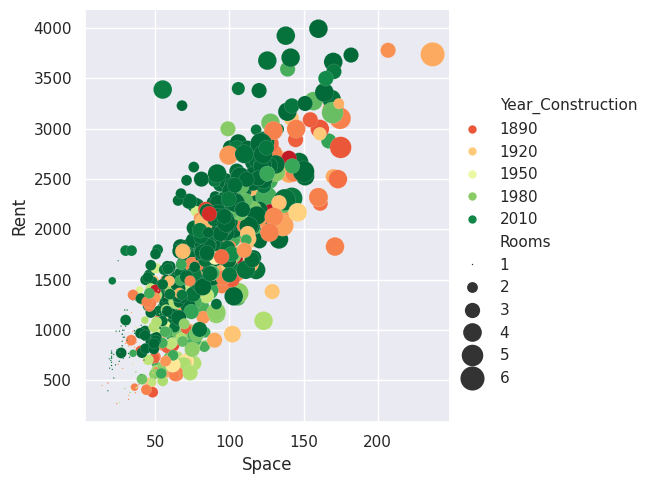

In [ ]:
#visualize all without outliers
sns.set_theme()
sns.relplot(data=no_outliers, x='Space', y='Rent',
            hue='Year_Construction', palette='RdYlGn',
            size='Rooms', sizes=(1,300))
plt.show()

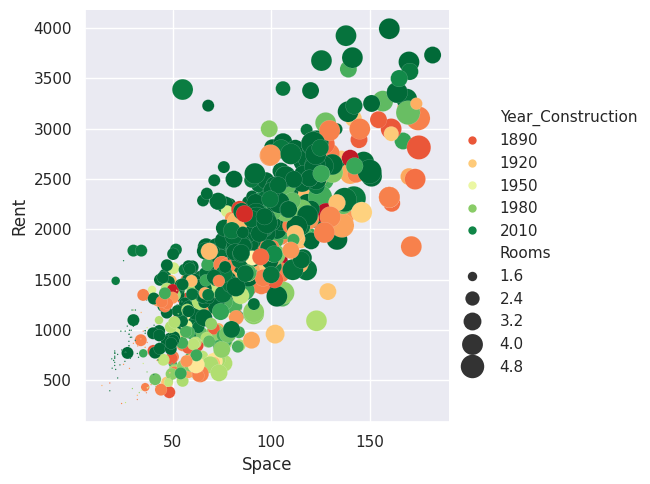

In [ ]:
#remove outliers by simply setting limits
#rentals.loc[(rentals["Region"] == "Kreuzberg") & (rentals["Year_Construction"] < 1900)]
outliers = rentals.loc[(rentals["Rent"] <= 4000) & (rentals["Space"] <= 200)]
sns.set_theme()
sns.relplot(data=outliers, x='Space', y='Rent',
            hue='Year_Construction', palette='RdYlGn',
            size='Rooms', sizes=(1,300))
plt.show()

**Measures of central tendency without outliers**

In [ ]:
round(no_outliers.describe(), 2)

,Rooms,Rent,Year_Construction,Space
count,732.00,732.00,732.00,732.00
mean,2.49,1607.61,1983.82,79.54
std,0.96,724.71,47.68,34.84
min,1.00,271.25,1864.00,14.00
25%,2.00,1005.25,1959.00,54.76
50%,2.00,1528.62,2015.00,76.00
75%,3.00,2084.00,2019.00,100.66
max,6.00,3994.00,2020.00,237.00


In [ ]:
round(outliers.describe(), 2)

,Rooms,Rent,Year_Construction,Space
count,730.00,730.00,730.00,730.00
mean,2.48,1601.71,1984.03,79.15
std,0.95,716.87,47.58,34.07
min,1.00,271.25,1864.00,14.00
25%,2.00,1001.75,1959.50,54.72
50%,2.00,1526.12,2015.00,76.00
75%,3.00,2078.36,2019.00,100.48
max,5.00,3994.00,2020.00,182.00


In [ ]:
#Rent
round(outliers['Rent'].median(), 2)

1526.12

In [ ]:
round(no_outliers['Rent'].median(), 2)

1528.62

In [ ]:
round(no_outliers['Rent'].mean(), 2)

1607.61

In [ ]:
round(outliers['Rent'].mean(), 2)

1601.71

In [ ]:
round(outliers['Rent'].mode(), 2)

0    1200.0
1    1650.0
Name: Rent, dtype: float64

In [ ]:
#Space
round(outliers['Space'].median(), 2)

76.0

In [ ]:
round(outliers['Space'].mean(), 2)

79.15

In [ ]:
round(outliers['Space'].mode(), 2)

0    20.5
1    60.0
Name: Space, dtype: float64

In [ ]:
#Rooms
round(outliers['Rooms'].median(), 2)

2.0

In [ ]:
round(outliers['Rooms'].mean(), 2)

2.48

In [ ]:
round(outliers['Rooms'].mode(), 2)

0    2.0
Name: Rooms, dtype: float64

In [ ]:
#year of construction
round(outliers['Year_Construction'].median(), 2)

2015.0

In [ ]:
round(outliers['Year_Construction'].mean(), 2)

1984.03

In [ ]:
round(outliers['Year_Construction'].mode(), 2)

0    2019
Name: Year_Construction, dtype: int64

In [ ]:
#table with outliers
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Columns", "Mean", "Median", "Mode"])

# Add rows
myTable.add_row(["Rent", "1768.56", "1565.48", "1200.00 / 1650"])
myTable.add_row(["Space", "84.66", "77.6", "20.5 / 60.0"])
myTable.add_row(["Rooms", "2.55", "2.5", "2.0"])
myTable.add_row(["Year_Construction", "1983.7", "2015", "2019"])
print(myTable)

+-------------------+---------+---------+----------------+
|      Columns      |   Mean  |  Median |      Mode      |
+-------------------+---------+---------+----------------+
|        Rent       | 1768.56 | 1565.48 | 1200.00 / 1650 |
|       Space       |  84.66  |   77.6  |  20.5 / 60.0   |
|       Rooms       |   2.55  |   2.5   |      2.0       |
| Year_Construction |  1983.7 |   2015  |      2019      |
+-------------------+---------+---------+----------------+


In [ ]:
#table without outliers
myTable = PrettyTable(["Columns", "Mean", "Median", "Mode"])

# Add rows
myTable.add_row(["Rent", "1601.71", "1526.12", "1200.00 / 1650.0"])
myTable.add_row(["Space", "79.15", "76.0", "20.5 / 60.0"])
myTable.add_row(["Rooms", "2.48", "2.0", "2.0"])
myTable.add_row(["Year_Construction", "1984.03", "2015", "2019"])
print(myTable)

+-------------------+---------+---------+------------------+
|      Columns      |   Mean  |  Median |       Mode       |
+-------------------+---------+---------+------------------+
|        Rent       | 1601.71 | 1526.12 | 1200.00 / 1650.0 |
|       Space       |  79.15  |   76.0  |   20.5 / 60.0    |
|       Rooms       |   2.48  |   2.0   |       2.0        |
| Year_Construction | 1984.03 |   2015  |       2019       |
+-------------------+---------+---------+------------------+


When we remove outliers, the mean rent for an apartment reduces by 166.85 euros. The mean space an apartment has also reduces from 84.66 to 79.15 square meters.

## **EXTRA MATERIAL**

**Using groupby with different functions for different columns**

The `.agg()` method also allows you to apply different functions to different columns. It's done by using a dictionary where the columns selected are the keys, and the functions you want to apply to each columns are the values. There is no need to select the columns before applying `.agg()` in this case, as the columns are selected inside the dictionary.

**Useful aggregation functions:**
- `mean()`
- `median()`
- `var()`
- `std()`
- `min()`
- `max()`
- `count()`
- `sum()`
- `nunique()`

**Bonus question #1:**

Revisit the `describe()` method from session #1. Study the output of the describe method, draw a simple barplot or any visual diagram for the dataset and check your understanding about the dataset.

In [ ]:
### Bonus question #1:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


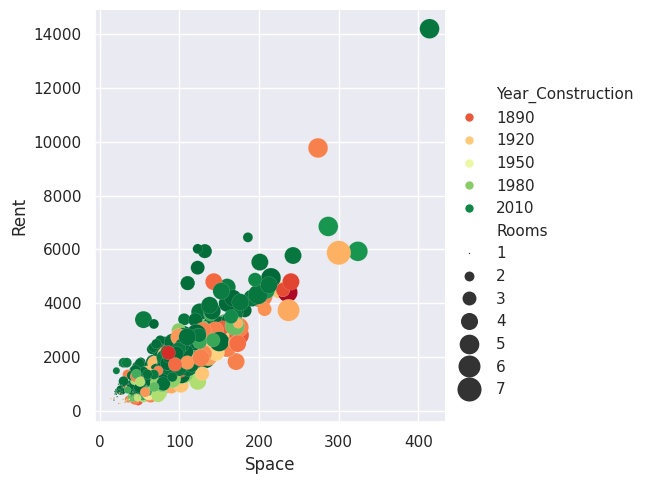

In [ ]:
sns.set_theme()
sns.relplot(data=rentals, x='Space', y='Rent',
            hue='Year_Construction', palette='RdYlGn',
            size='Rooms', sizes=(1,300))
plt.show()

The rent increases with an increase in the size of an apartment in terms of space in square meters. Apartments with bigger spaces cost more while smaller apartments cost less.

The year an apartment was constructed does not have any effect on rent.

Most apartments are below 250 square meters of space and they cost mostly under 5,000 euros per month.

**Bonus question #2:**

Below mentioned are the points for 2 teams who participated in a Premiere league football batch. When a team wins a match, they get **3** points, if they lose the match then they get **0** points and if the match is draw then they get **1** point.

Study the data and share your understanding, mainly

According to you, Which team has performed better, why?

Team A : { 3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0 }

Team B : { 3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3 }

In [ ]:
### Bonus question #2:
Team_A = [3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0]
sum(Team_A)

27

In [ ]:
#value count with numpy to count occurency of each value
np.unique(Team_A, return_counts= True)

(array([0, 1, 3]), array([5, 9, 6]))

In [ ]:
Team_B = [3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3]
sum(Team_B)

27

In [ ]:
np.unique(Team_B, return_counts= True)

(array([0, 1, 3]), array([7, 6, 7]))

Team B lost more but also worn more matches while team A lost fewer and worn fewer matches. Therefore, if we consider only the matches a team worn, then team B performed better. However, if we consider only the matches a team lost, then team A performed better.

**Bonus question #3:**

Based on the available cars data, Check whether the below hypothesis are valid.


1) If the doors are more, then the price of the car is high

2) If the price of the car is high, then the usage of the car is high ( Kms)


In [ ]:
### Bonus question #3:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      10000 non-null  object 
 1   Model     10000 non-null  object 
 2   Year      10000 non-null  int64  
 3   Variant   10000 non-null  object 
 4   Kms       10000 non-null  int64  
 5   Price     10000 non-null  int64  
 6   Doors     10000 non-null  float64
 7   Kind      10000 non-null  object 
 8   Location  10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


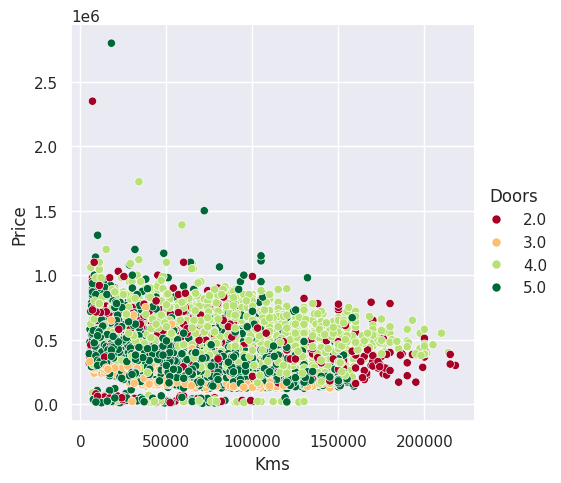

In [ ]:
#visualize the relationship between the price of cars, doors and usage in kms
sns.set_theme()
sns.relplot(data=cars, x='Kms', y='Price',
            hue='Doors', palette='RdYlGn')
plt.show()

In [ ]:
cars.corr(numeric_only=True)

,Year,Kms,Price,Doors
Year,1.000000,-0.681050,0.447238,-0.029587
Kms,-0.681050,1.000000,-0.159018,-0.070608
Price,0.447238,-0.159018,1.000000,-0.111588
Doors,-0.029587,-0.070608,-0.111588,1.000000


In [ ]:
### Bonus question #3.1:
np.corrcoef(cars.Doors, cars.Price)

array([[ 1.        , -0.11158822],
       [-0.11158822,  1.        ]])

The data does not support this hypothesis, so we reject it.

In [ ]:
#3.2
np.corrcoef(cars.Price, cars.Kms)

array([[ 1.       , -0.1590182],
       [-0.1590182,  1.       ]])

The data does not support this hypothesis, so we reject it.